In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

try:
    import cv2
except ImportError:
    cv2 = None
    print('cv2 not installed. Run: pip install opencv-python')

def read_rgb(path):
    return np.array(Image.open(path).convert('RGB'))

def show(img, title='', gray=False):
    plt.figure(figsize=(5, 4))
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

image_paths = sorted(Path('.').glob('*.png'))
images = {p.name: read_rgb(p) for p in image_paths}
print('Images found:', list(images.keys()))


Images found: ['1.png', '2.png']


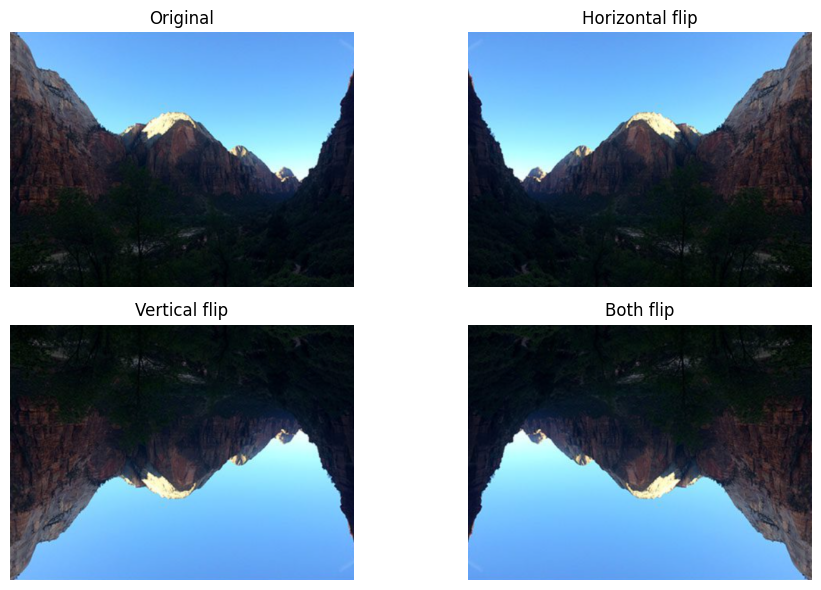

In [10]:
img_rgb = read_rgb(image_paths[0])

# Horizontal flip
if cv2 is not None:
    hflip = cv2.flip(img_rgb, 1)
    # Vertical flip
    vflip = cv2.flip(img_rgb, 0)
    # Both directions
    hvflip = cv2.flip(img_rgb, -1)


# Show results
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(hflip)
plt.title('Horizontal flip')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(vflip)
plt.title('Vertical flip')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(hvflip)
plt.title('Both flip')
plt.axis('off')

plt.tight_layout()
plt.show()


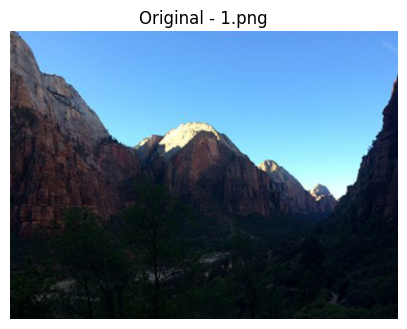

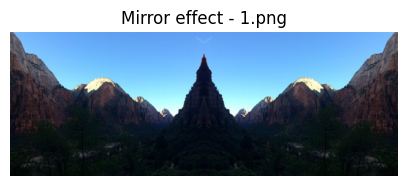

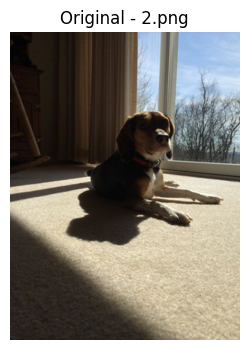

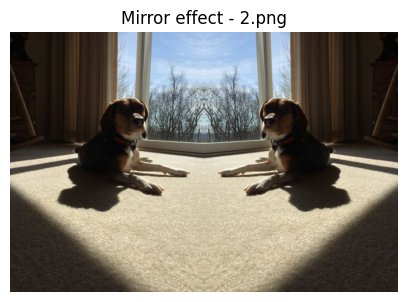

In [11]:
def mirror_effect(img):
    return np.hstack([img, img[:, ::-1]])

for name, img in images.items():
    show(img, f'Original - {name}')
    show(mirror_effect(img), f'Mirror effect - {name}')


## B) Intensity Transformation


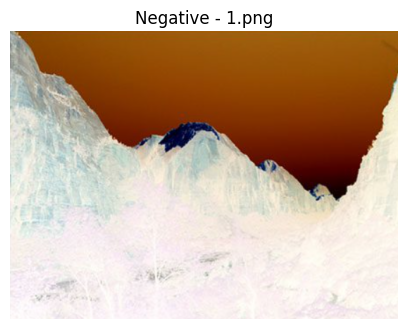

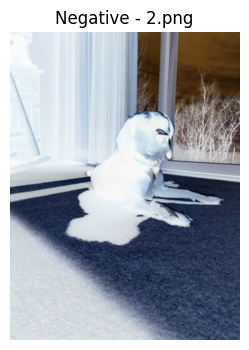

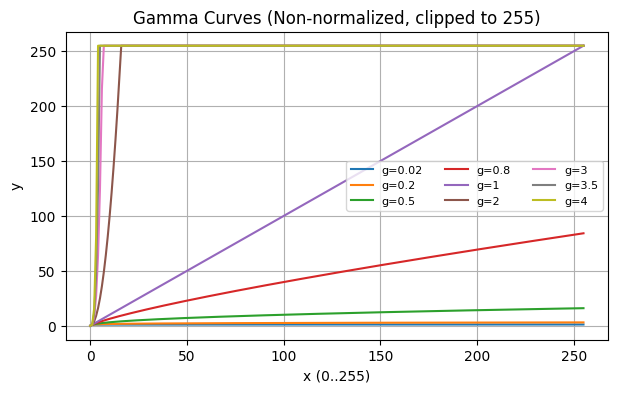

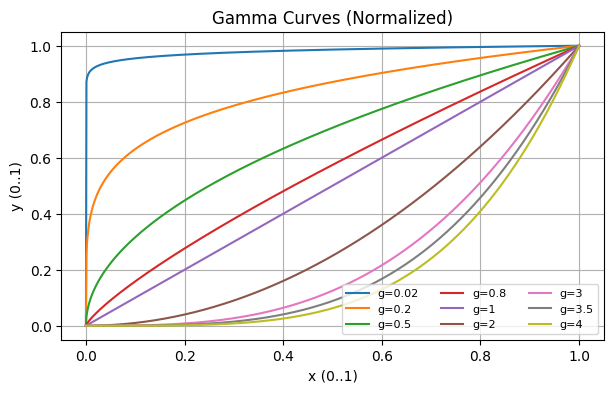

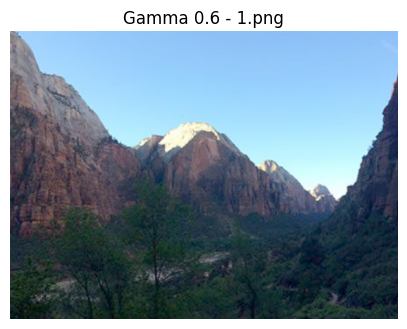

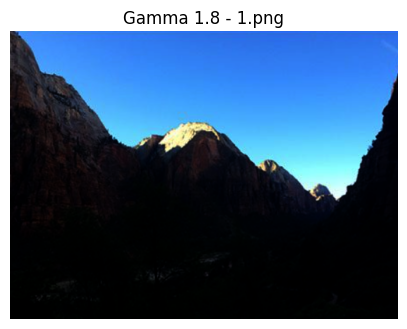

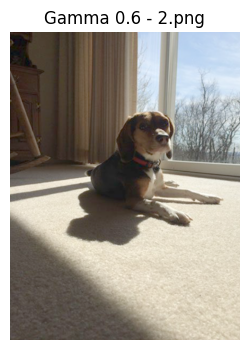

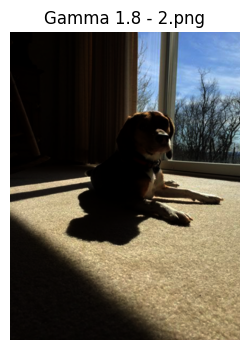

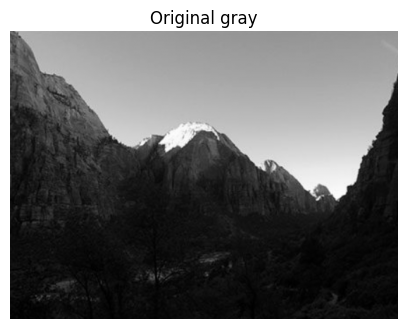

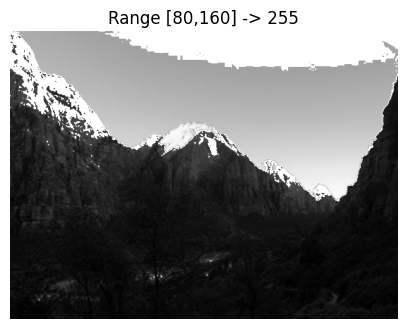

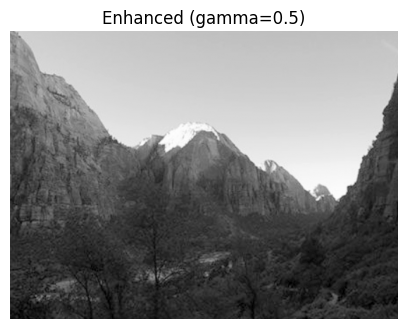

In [13]:
def image_negative(img):
    return 255 - img

def gamma_correction(img, gamma=1.0):
    x = img / 255.0
    y = np.power(x, gamma)
    return (y * 255).astype(np.uint8)

def set_range_to_white(gray_img, A, B):
    out = gray_img.copy()
    mask = (out >= A) & (out <= B)
    out[mask] = 255
    return out

# 1) Negative on all images
for name, img in images.items():
    show(image_negative(img), f'Negative - {name}')

# 2) Gamma curves (non-normalized and normalized)
gammas = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]

x_non = np.arange(0, 256)
plt.figure(figsize=(7, 4))
for g in gammas:
    y_non = np.clip(x_non ** g, 0, 255)
    plt.plot(x_non, y_non, label=f'g={g}')
plt.title('Gamma Curves (Non-normalized, clipped to 255)')
plt.xlabel('x (0..255)')
plt.ylabel('y')
plt.legend(ncol=3, fontsize=8)
plt.grid(True)
plt.show()

x_norm = np.linspace(0, 1, 1001)
plt.figure(figsize=(7, 4))
for g in gammas:
    y_norm = x_norm ** g
    plt.plot(x_norm, y_norm, label=f'g={g}')
plt.title('Gamma Curves (Normalized)')
plt.xlabel('x (0..1)')
plt.ylabel('y (0..1)')
plt.legend(ncol=3, fontsize=8)
plt.grid(True)
plt.show()

# 3) Gamma correction on images
for name, img in images.items():
    show(gamma_correction(img, 0.6), f'Gamma 0.6 - {name}')
    show(gamma_correction(img, 1.8), f'Gamma 1.8 - {name}')

# 4) Set intensities in [A, B] to white (L-1)
first_gray = np.array(Image.open(image_paths[0]).convert('L'))
show(first_gray, 'Original gray', gray=True)
show(set_range_to_white(first_gray, 80, 160), 'Range [80,160] -> 255', gray=True)

# 5) Simple enhancement example
show(gamma_correction(first_gray, 0.5), 'Enhanced (gamma=0.5)', gray=True)

## C) Bit-Plane Slicing


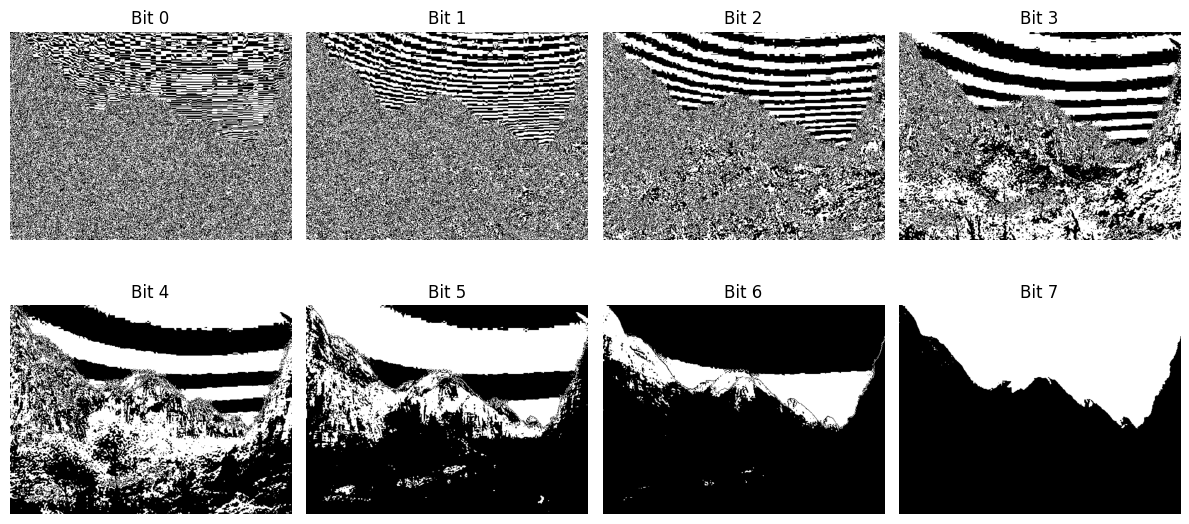

In [8]:
def displayBitResponse(gray_img):
    plt.figure(figsize=(12, 6))
    for bit in range(8):
        plane = ((gray_img >> bit) & 1) * 255
        plt.subplot(2, 4, bit + 1)
        plt.imshow(plane, cmap='gray')
        plt.title(f'Bit {bit}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

gray_img = np.array(Image.open(image_paths[0]).convert('L'))
displayBitResponse(gray_img)